In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train_data = pd.read_csv("D:\\machinelearningprojects\\nlp-getting-started\\train.csv")

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
train_data['text'][:]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [11]:
!pip install gensim
!pip install nltk

  Created wheel for smart-open: filename=smart_open-1.9.0-cp37-none-any.whl size=73092 sha256=e7188e720b6597b018271d2c9ecb51fce162823a9d9819700d7a6503ce79e2cc
  Stored in directory: C:\Users\wsy88\AppData\Local\pip\Cache\wheels\ab\10\93\5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open


In [263]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wsy88\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [434]:
import re
regex = re.compile('htt.')
s = 'httpse'
if re.search(regex, s):
    print('yes')

    

yes


In [435]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

In [436]:
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
       # print(token)
        if token not in STOPWORDS and len(token) > 3 and not re.search(regex, token):
            result.append(lemmatize_stemming(token))
    return result

In [437]:
train_true = train_data.loc[train_data['target'] == 1]['text']
train_false = train_data.loc[train_data['target'] == 0]['text']

In [438]:
train_true

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [439]:
#print('original document: ')

preprocessed_train_true = []
for sample in train_true:
    words = []
    for word in sample.split(' '):
        words.append(word)
    preprocessed_train_true.append(preprocess(sample))
    
preprocessed_train_false = []
for sample in train_false:
    words = []
    for word in sample.split(' '):
        words.append(word)
    preprocessed_train_false.append(preprocess(sample))    

In [440]:
preprocessed_train = preprocessed_train_true + preprocessed_train_false
print(preprocessed_train)

[['deeds', 'reason', 'earthquake', 'allah', 'forgive'], ['forest', 'near', 'ronge', 'sask', 'canada'], ['residents', 'ask', 'shelter', 'place', 'notify', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expect'], ['people', 'receive', 'wildfires', 'evacuation', 'order', 'california'], ['send', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pour', 'school'], ['rockyfire', 'update', 'california', 'close', 'directions', 'lake', 'county', 'cafire', 'wildfires'], ['flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 'flood', 'streets', 'manitou', 'colorado', 'spring', 'areas'], ['hill', 'woods'], ['emergency', 'evacuation', 'happen', 'build', 'street'], ['afraid', 'tornado', 'come', 'area'], ['people', 'die', 'heat', 'wave'], ['haha', 'south', 'tampa', 'get', 'flood', 'wait', 'second', 'live', 'south', 'tampa', 'gonna', 'gonna', 'fvck', 'flood'], ['rain', 'flood', 'florida', 'tampabay', 'tampa', 'days', 'lose', 'count'], ['flood', 'bago', 'myanmar', 'arrive', 'bago'], ['damage',

In [413]:
dictionary = gensim.corpora.Dictionary(preprocessed_train)
len(dictionary)

17251

In [414]:
dictionary.filter_extremes(no_below=4, keep_n=100000)
len(dictionary)

2443

In [415]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_train]

In [420]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5443170237702365),
 (1, 0.41616236937411233),
 (2, 0.5770601774923503),
 (3, 0.44444281016046794)]


In [422]:
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=100, workers=4)

In [423]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.011*"scream" + 0.010*"suicide" + 0.008*"wreck" + 0.008*"kill" + 0.008*"families" + 0.006*"bomb" + 0.006*"disaster" + 0.006*"obama" + 0.005*"school" + 0.005*"legionnaires"
Topic: 1 
Words: 0.012*"bomb" + 0.010*"like" + 0.008*"hiroshima" + 0.008*"drown" + 0.007*"storm" + 0.006*"watch" + 0.006*"feel" + 0.006*"years" + 0.006*"destroy" + 0.005*"collapse"
Topic: 2 
Words: 0.010*"crush" + 0.007*"love" + 0.007*"body" + 0.006*"explode" + 0.006*"flood" + 0.006*"thunder" + 0.005*"fear" + 0.005*"earthquake" + 0.005*"natural" + 0.005*"weather"
Topic: 3 
Words: 0.014*"burn" + 0.008*"crash" + 0.007*"build" + 0.006*"electrocute" + 0.006*"die" + 0.006*"accident" + 0.006*"traumatise" + 0.006*"hope" + 0.005*"fall" + 0.005*"debris"
Topic: 4 
Words: 0.007*"home" + 0.007*"like" + 0.006*"california" + 0.006*"emergency" + 0.006*"look" + 0.006*"smoke" + 0.006*"wildfire" + 0.005*"time" + 0.005*"news" + 0.004*"weapon"


In [424]:
unseen_document = preprocessed_train_false[100]
print(unseen_document)
bow_vector = dictionary.doc2bow(unseen_document)
vector_tfidf = tfidf[bow_vector]
result = lda_model[vector_tfidf]
results = []
for i in range(2):
    results.append(result[i][1])
print(results.index(max(results)))


['kiwi_karyn', 'check', 'park', 'say', 'year', 'ambulance', 'johns', 'hpvodud']
1


In [428]:
def feed_lda(unseen_document):
    bow_vector = dictionary.doc2bow(unseen_document)
    vector_tfidf = tfidf[bow_vector]
    result = lda_model[vector_tfidf]
    results = []
    for i in range(5):
        results.append(result[i][1])
    return results.index(max(results))
    

In [429]:
index_false = []
for doc in preprocessed_train_false:
    index_false.append(feed_lda(doc))

(array([ 666.,    0.,  926.,    0.,    0.,  890.,    0.,  715.,    0.,
        1145.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

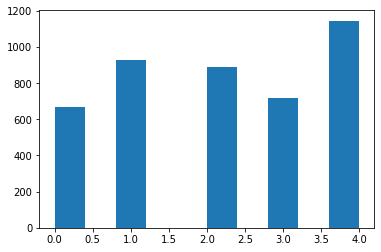

In [430]:
plt.hist(index_false)

(array([661.,   0., 716.,   0.,   0., 595.,   0., 581.,   0., 718.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

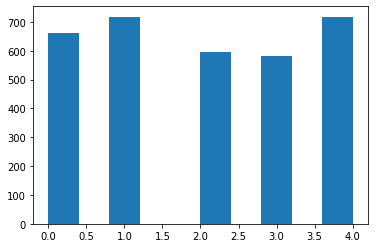

In [431]:
index_true = []
for doc in preprocessed_train_true:
    index_true.append(feed_lda(doc))
plt.hist(index_true)